In [1]:
pip install opencv-python pandas matplotlib seaborn numpy


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Check the columns of the annotations DataFrame
print(annotations.columns)


Index(['image_name', 'width', 'height', 'x0', 'y0', 'x1', 'y1'], dtype='object')


     image_name  width  height   x0   y0    x1   y1
0  00001722.jpg   1333    2000  490  320   687  664
1  00001044.jpg   2000    1333  791  119  1200  436
2  00001050.jpg    667    1000  304  155   407  331
3  00001736.jpg    626     417  147   14   519  303
4  00003121.jpg    626     418  462   60   599  166
Total number of images: 2165
Face counts per image:
image_name
00000003.jpg    1
00000004.jpg    1
00000005.jpg    1
00000006.jpg    1
00000008.jpg    1
dtype: int64


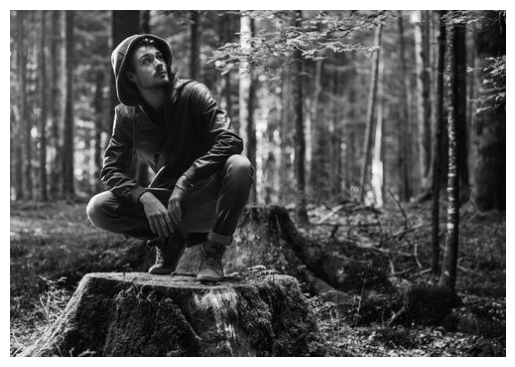

Missing annotations: 0


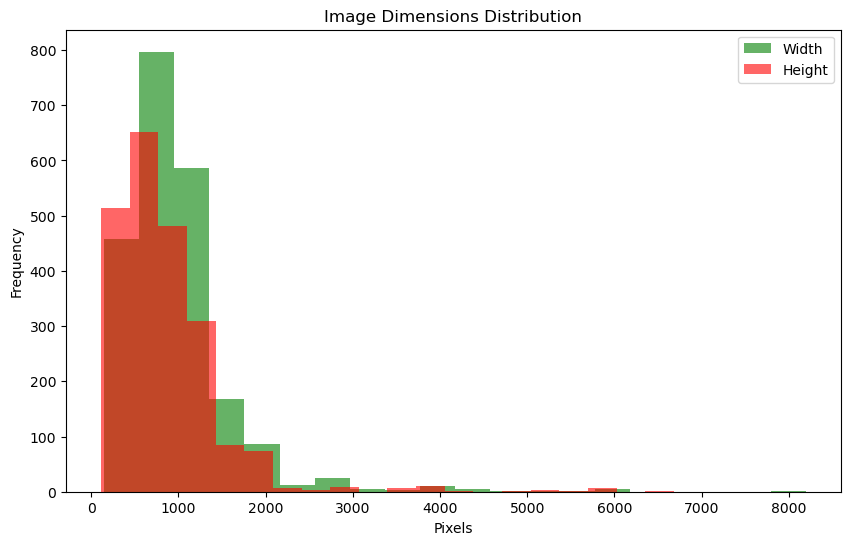

Images that may need resizing (Width or Height < 200): 18


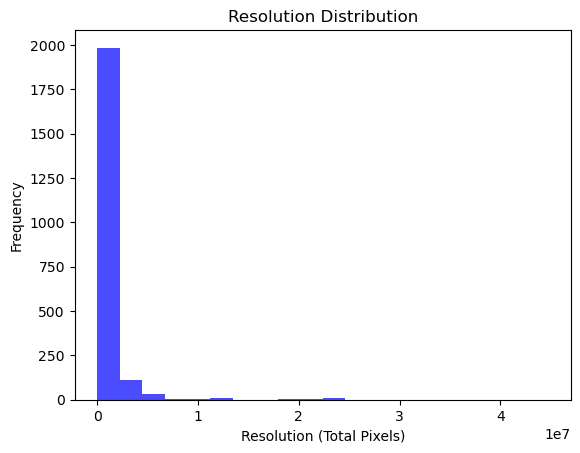

Low resolution images: 0
Images with faces: 2204
Images without faces: -39
Face density (mean, min, max):
count    2204.000000
mean        1.519964
std         1.267299
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
dtype: float64


In [6]:
# Importing necessary libraries
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm

# Define path to the dataset
image_folder = "C:\\Users\\kalpana\\Downloads\\processed_images"  # Update with your image folder path
annotations_file = "C:\\Users\\kalpana\\Downloads\\faces.csv" # Update with your annotations file path

# Load the annotations (Assuming CSV format: image_name, width, height, x0, y0, x1, y1)
annotations = pd.read_csv(annotations_file)

# Check the first few rows of annotations
print(annotations.head())

# 1. **Image Count**: Count total number of images
image_paths = glob(os.path.join(image_folder, '*.jpg'))  # or '*.png' if needed
total_images = len(image_paths)
print(f"Total number of images: {total_images}")

# 2. **Face Count**: Calculate the number of faces in each image
# Count faces per image using annotations
face_counts = annotations.groupby('image_name').size()
print(f"Face counts per image:\n{face_counts.head()}")

# 3. **Bounding Box Accuracy**: Visualize bounding boxes and check if they are correctly placed
def show_image_with_bbox(image_path, bbox):
    image = cv2.imread(image_path)
    for box in bbox:
        x0, y0, x1, y1 = box
        cv2.rectangle(image, (x0, y0), (x1, y1), (0, 255, 0), 2)  # Green bounding box
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Visualize bounding boxes on a sample image
sample_image = image_paths[0]  # Select the first image from the dataset
sample_bboxes = annotations[annotations['image_name'] == os.path.basename(sample_image)][['x0', 'y0', 'x1', 'y1']].values
show_image_with_bbox(sample_image, sample_bboxes)

# 4. **Label Consistency**: Check for missing or inconsistent labels
missing_annotations = annotations[annotations.isnull().any(axis=1)]
print(f"Missing annotations: {len(missing_annotations)}")

# 5. **Resize Requirements**: Check image dimensions and identify if resizing is needed
def get_image_dimensions(image_path):
    image = cv2.imread(image_path)
    return image.shape[:2]  # Return (height, width)

image_dimensions = [get_image_dimensions(image) for image in image_paths]
image_dimensions_df = pd.DataFrame(image_dimensions, columns=['Height', 'Width'])

# Plot the distribution of image sizes
plt.figure(figsize=(10, 6))
plt.hist(image_dimensions_df['Width'], bins=20, alpha=0.6, color='g', label='Width')
plt.hist(image_dimensions_df['Height'], bins=20, alpha=0.6, color='r', label='Height')
plt.legend(loc='upper right')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Image Dimensions Distribution')
plt.show()

# Check if resizing is needed based on the distribution
resize_required = image_dimensions_df[(image_dimensions_df['Width'] < 200) | (image_dimensions_df['Height'] < 200)]
print(f"Images that may need resizing (Width or Height < 200): {len(resize_required)}")

# 6. **Resolution**: Evaluate image resolution
def get_resolution(image_path):
    image = cv2.imread(image_path)
    return image.shape[0] * image.shape[1]  # Total pixels (resolution)

resolutions = [get_resolution(image) for image in image_paths]
plt.hist(resolutions, bins=20, color='b', alpha=0.7)
plt.xlabel('Resolution (Total Pixels)')
plt.ylabel('Frequency')
plt.title('Resolution Distribution')
plt.show()

# Identify low resolution images (resolution < 20000 pixels)
low_res_images = [image for image, res in zip(image_paths, resolutions) if res < 20000]
print(f"Low resolution images: {len(low_res_images)}")

# Additional analysis: Class Imbalance (positive vs negative images)
# Assuming face detection labels are available, check class distribution (with/without faces)
with_faces = annotations.groupby('image_name').size()
without_faces = total_images - len(with_faces)

print(f"Images with faces: {len(with_faces)}")
print(f"Images without faces: {without_faces}")

# Face distribution: Count faces in all images
face_density = annotations.groupby('image_name').size().describe()
print(f"Face density (mean, min, max):\n{face_density}")


In [1]:
# Save text-based results to a file
output_file = "eda_results.txt"

with open(output_file, "w") as f:
    f.write(f"Total number of images: {total_images}\n\n")
    f.write("Face counts per image:\n")
    f.write(face_counts.to_string() + "\n\n")
    f.write(f"Missing annotations: {len(missing_annotations)}\n\n")
    f.write(f"Images that may need resizing (Width or Height < 200): {len(resize_required)}\n\n")
    f.write(f"Low resolution images: {len(low_res_images)}\n\n")
    f.write(f"Images with faces: {len(with_faces)}\n")
    f.write(f"Images without faces: {without_faces}\n\n")
    f.write(f"Face density (mean, min, max):\n{face_density}\n")


NameError: name 'total_images' is not defined

In [3]:
# Import necessary libraries
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Define dataset paths (Update these paths)
image_folder = "C:\\Users\\kalpana\\Downloads\\processed_images"  # Replace with the actual path
annotations_file = "C:\\Users\\kalpana\\Downloads\\faces.csv"  # Replace with actual path

# Load annotations
annotations = pd.read_csv(annotations_file)

# Count total number of images
image_paths = glob(os.path.join(image_folder, '*.jpg'))  # Change extension if needed
total_images = len(image_paths)

# Count faces per image
face_counts = annotations.groupby('image_name').size()

# Find missing annotations
missing_annotations = annotations[annotations.isnull().any(axis=1)]

# Check if resizing is needed
def get_image_dimensions(image_path):
    image = cv2.imread(image_path)
    return image.shape[:2] if image is not None else (None, None)

image_dimensions = [get_image_dimensions(image) for image in image_paths]
image_dimensions_df = pd.DataFrame(image_dimensions, columns=['Height', 'Width'])

resize_required = image_dimensions_df[(image_dimensions_df['Width'] < 200) | (image_dimensions_df['Height'] < 200)]

# Check resolution
def get_resolution(image_path):
    image = cv2.imread(image_path)
    return image.shape[0] * image.shape[1] if image is not None else 0

resolutions = [get_resolution(image) for image in image_paths]
low_res_images = [image for image, res in zip(image_paths, resolutions) if res < 20000]

# Count images with and without faces
with_faces = annotations.groupby('image_name').size()
without_faces = total_images - len(with_faces)

# Face density statistics
face_density = face_counts.describe()

# **Now Save the Output**
output_file = "eda_results.txt"

with open(output_file, "w") as f:
    f.write(f"Total number of images: {total_images}\n\n")
    f.write("Face counts per image:\n")
    f.write(face_counts.to_string() + "\n\n")
    f.write(f"Missing annotations: {len(missing_annotations)}\n\n")
    f.write(f"Images that may need resizing (Width or Height < 200): {len(resize_required)}\n\n")
    f.write(f"Low resolution images: {len(low_res_images)}\n\n")
    f.write(f"Images with faces: {len(with_faces)}\n")
    f.write(f"Images without faces: {without_faces}\n\n")
    f.write(f"Face density statistics:\n{face_density}\n")

print("EDA results saved to eda_results.txt successfully!")


EDA results saved to eda_results.txt successfully!


In [4]:
import os
os.getcwd()  # This will show the current working directory


'C:\\Users\\kalpana'

In [5]:
import os
print(os.listdir())  # List all files in the current directory


['.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.spss', 'anaconda3', 'AppData', 'Application Data', 'augmented_images', 'Class 26.ipynb', 'Contacts', 'Cookies', 'data engineering.ipynb', 'Data Preprocessing Practice Note book.ipynb', 'data visualation class.ipynb', 'dataset', 'Dataspark analysis.ipynb', 'Dataspark project.ipynb', 'Day October 1.ipynb', 'detected_faces', 'Documents', 'Downloads', 'EDA.ipynb', 'eda_results.txt', 'Face Detection.ipynb', 'Favorites', 'Final project 1.ipynb', 'Final Project.ipynb', 'Guvi', 'kalpana', 'Links', 'Local Settings', 'ML day2.ipynb', 'MLearning.ipynb', 'muruga.ipynb', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000

In [6]:
with open("eda_results.txt", "r") as file:
    print(file.read())  # Print the file content


Total number of images: 2165

Face counts per image:
image_name
00000003.jpg     1
00000004.jpg     1
00000005.jpg     1
00000006.jpg     1
00000008.jpg     1
00000011.jpg     1
00000012.jpg     1
00000015.jpg     1
00000018.jpg     1
00000020.jpg     1
00000022.jpg     1
00000023.jpg     1
00000024.jpg     2
00000026.jpg     2
00000031.jpg     1
00000032.jpg     1
00000041.jpg     1
00000044.jpg     1
00000045.jpg     1
00000047.jpg     2
00000050.jpg     1
00000051.jpg     1
00000055.jpg     1
00000058.jpg     2
00000061.jpg     1
00000067.jpg     1
00000068.jpg     3
00000069.jpg     1
00000072.jpg     1
00000074.jpg     1
00000075.jpg     1
00000077.jpg     1
00000082.jpg     1
00000085.jpg     1
00000086.jpg     1
00000087.jpg     2
00000088.jpg     1
00000089.jpg     1
00000091.jpg     1
00000094.jpg     1
00000095.jpg     1
00000097.jpg     1
00000099.jpg     3
00000100.jpg     1
00000103.jpg     1
00000104.jpg     3
00000105.jpg     1
00000107.jpg     1
00000110.jpg     1
00000

In [7]:
import shutil
shutil.move("eda_results.txt", os.path.expanduser("~/Downloads/eda_results.txt"))
print("File moved to Downloads folder.")


File moved to Downloads folder.
